<h1>Unsupervised Machine Learning<h1>

---


***Panduan menyelesaikan permasalahan Unsupervised Machine Learning***

# Clustering

### Import Library yang Diperlukan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [38]:
url = "https://raw.githubusercontent.com/uc-kdwiheldy/clustering-week-8/main/dataset.csv"

df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,30.0,60.00,2,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
1,Standard,Kenjeran,170.0,170.00,5,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,Kenjeran,187.0,250.00,5,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
3,Premium,Kenjeran,350.0,600.00,5,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
4,Premium,Kenjeran,450.0,530.00,5,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil


In [39]:
# Check apakah sdh tidak ada missing data (Non-Null Count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    int64  
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2

### Data Preparation
Drop kolom yang tidak dapat digunakan untuk clustering

In [40]:
df.rename(columns = { 'Tingkat/Lantai ': 'Tingkat' }, inplace = True)

df = df[['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat', 'Harga Penawaran (dari Owner)', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']]
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,30.0,60.00,2,1.0,2.0,287799000,Standard,< 1 Mobil
1,Standard,170.0,170.00,5,4.0,2.0,2699999999,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,187.0,250.00,5,5.0,2.0,3100000000,Standard,1-2 Mobil
3,Premium,350.0,600.00,5,5.0,2.0,5000000000,Standard,1-2 Mobil
4,Premium,450.0,530.00,5,6.0,2.0,10800000000,Standard,1-2 Mobil


### Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Luas Tanah (m2)                307 non-null    float64
 2   Luas Bangunan (m2)             307 non-null    object 
 3   Jumlah Kamar                   307 non-null    int64  
 4   Jumlah Kamar Mandi             306 non-null    float64
 5   Tingkat                        306 non-null    float64
 6   Harga Penawaran (dari Owner)   307 non-null    object 
 7   Posisi Rumah                   192 non-null    object 
 8   Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.7+ KB


In [42]:
df['Harga Penawaran (dari Owner)'].replace('', np.nan, inplace = True)
df = df.dropna(subset = ['Tingkat', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  305 non-null    object 
 1   Luas Tanah (m2)                305 non-null    float64
 2   Luas Bangunan (m2)             305 non-null    object 
 3   Jumlah Kamar                   305 non-null    int64  
 4   Jumlah Kamar Mandi             305 non-null    float64
 5   Tingkat                        305 non-null    float64
 6   Harga Penawaran (dari Owner)   305 non-null    object 
 7   Posisi Rumah                   192 non-null    object 
 8   Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 23.8+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
df[df.duplicated()]

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
13,Standard,104.0,215.00,4,4.0,2.0,1350000000,Standard,1-2 Mobil
109,Standard,134.0,200,7,2.0,2.0,2000000000,Standard,> 2 Mobil
113,Standard,170.0,120,4,3.0,1.0,2400000000,Standard,> 2 Mobil


In [44]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  302 non-null    object 
 1   Luas Tanah (m2)                302 non-null    float64
 2   Luas Bangunan (m2)             302 non-null    object 
 3   Jumlah Kamar                   302 non-null    int64  
 4   Jumlah Kamar Mandi             302 non-null    float64
 5   Tingkat                        302 non-null    float64
 6   Harga Penawaran (dari Owner)   302 non-null    object 
 7   Posisi Rumah                   189 non-null    object 
 8   Lebar Jalan Depan Rumah (ROW)  263 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 23.6+ KB


In [45]:
df['Area Category'].replace(['Below Standard', 'Standard','Premium','Sangat Premium'], [0,1,2,3], inplace=True)
df['Posisi Rumah'].replace(['Standard', 'Cul De Sac/Ujung Gang Buntu', 'Tusuk Sate', 'Tikungan/Hook', 'Tusuk Belakang/Membelakangi Jalan', 'Kantong Belakang/Ngantong'], [0,1,2,3,4,5], inplace=True)
df['Lebar Jalan Depan Rumah (ROW)'].replace(['< 1 Mobil', '1-2 Mobil', '> 2 Mobil'], [0,1,2], inplace=True)

for index, row in df.iterrows():
    for name, values in row.iteritems():
      val = row[name]
      if type(val) is str:
          val = val.strip()
          val = val.replace(' ', '').replace(',', '')
          if '.' in val:
            val = float(val)
          elif val != '':
            val = int(val)
          else:
            val = 0
          row[name] = val
      df.loc[index] = row

df.head(300)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0,30.0,60.0,2,1.0,2.0,287799000,0.0,0.0
1,1,170.0,170.0,5,4.0,2.0,2699999999,1.0,1.0
2,3,187.0,250.0,5,5.0,2.0,3100000000,0.0,1.0
3,2,350.0,600.0,5,5.0,2.0,5000000000,0.0,1.0
4,2,450.0,530.0,5,6.0,2.0,10800000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...
300,2,180.0,150,3,2.0,2.0,2300000000,NaN,2.0
301,1,216.0,246,4,2.0,2.0,1850000000,NaN,1.0
302,1,47.0,34,2,1.0,1.0,450000000,NaN,2.0
303,3,300.0,212,4,4.0,1.0,5250000000,NaN,NaN


In [46]:
nb = GaussianNB()

testdf = df[df['Posisi Rumah'].isnull()==True]
traindf = df[df['Posisi Rumah'].isnull()==False]

y = traindf['Posisi Rumah']
traindf.drop("Posisi Rumah",axis=1,inplace=True)
traindf.drop("Lebar Jalan Depan Rumah (ROW)",axis=1,inplace=True)
testdf.drop("Posisi Rumah",axis=1,inplace=True)
testdf.drop("Lebar Jalan Depan Rumah (ROW)",axis=1,inplace=True)

nb.fit(traindf,y)
pred = nb.predict(testdf)

testdf['Posisi Rumah'] = pred
traindf['Posisi Rumah'] = y

df2 = testdf.append(traindf)
df2["Lebar Jalan Depan Rumah (ROW)"] = df["Lebar Jalan Depan Rumah (ROW)"]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 76 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  302 non-null    int64  
 1   Luas Tanah (m2)                302 non-null    float64
 2   Luas Bangunan (m2)             302 non-null    object 
 3   Jumlah Kamar                   302 non-null    int64  
 4   Jumlah Kamar Mandi             302 non-null    float64
 5   Tingkat                        302 non-null    float64
 6   Harga Penawaran (dari Owner)   302 non-null    object 
 7   Posisi Rumah                   302 non-null    float64
 8   Lebar Jalan Depan Rumah (ROW)  263 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 23.6+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [47]:
nb = GaussianNB()

testdf = df2[df2['Lebar Jalan Depan Rumah (ROW)'].isnull()==True]
traindf = df2[df2['Lebar Jalan Depan Rumah (ROW)'].isnull()==False]

y = traindf['Lebar Jalan Depan Rumah (ROW)']

traindf.drop("Lebar Jalan Depan Rumah (ROW)",axis=1,inplace=True)
testdf.drop("Lebar Jalan Depan Rumah (ROW)",axis=1,inplace=True)

nb.fit(traindf,y)
pred = nb.predict(testdf)

testdf['Lebar Jalan Depan Rumah (ROW)'] = pred
traindf['Lebar Jalan Depan Rumah (ROW)'] = y

df3 = testdf.append(traindf)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 76 to 306
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  302 non-null    int64  
 1   Luas Tanah (m2)                302 non-null    float64
 2   Luas Bangunan (m2)             302 non-null    object 
 3   Jumlah Kamar                   302 non-null    int64  
 4   Jumlah Kamar Mandi             302 non-null    float64
 5   Tingkat                        302 non-null    float64
 6   Harga Penawaran (dari Owner)   302 non-null    object 
 7   Posisi Rumah                   302 non-null    float64
 8   Lebar Jalan Depan Rumah (ROW)  302 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 23.6+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [48]:
df3.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
76,3,845.0,1200,7,8.0,2.0,39999990000,3.0,1.0
94,1,120.0,130,3,3.0,2.0,1350000000,0.0,1.0
117,1,96.0,135,3,3.0,2.0,2600000000,0.0,1.0
150,3,364.0,450,6,5.0,2.0,9500000000,0.0,2.0
151,3,600.0,700,5,5.0,2.0,16500000000,0.0,1.0


### Feature Scaling

In [49]:
sc = StandardScaler()
df = sc.fit_transform(df)
print(df)

[[-1.75176204 -0.97483683 -0.9723657  ... -0.5673162  -0.42573466
  -2.38640262]
 [-0.50698054 -0.28501606 -0.45918771 ... -0.27908229  0.49913719
  -0.65741119]
 [ 1.98258245 -0.20125211 -0.08596735 ... -0.23128629 -0.42573466
  -0.65741119]
 ...
 [ 0.73780095 -0.62007186 -0.52450127 ... -0.36869979 -0.42573466
  -0.65741119]
 [-0.50698054 -0.63978103 -0.45918771 ... -0.41649579 -0.42573466
   1.07158024]
 [-1.75176204 -0.17168836  0.14729537 ... -0.00425528 -0.42573466
   1.07158024]]


## K-Means Clustering
Algoritma K-Means adalah algoritma iteratif yang mencoba untuk mempartisi dataset menjadi subkelompok (cluster) non-overlapping yang dikumpulkan berdasarkan kedekatan dengan beberapa titik pusat cluster (centroid) dimana setiap titik data hanya boleh menjadi anggota dari 1 cluster. 

### K-Means Algorithm
How it works? Basically:

    1- initial clusters centers (centroids) are randomly chosen
    2- the observations are assigned to the closest centroid, based in some distance measure
    3- the centroids are recalculated with the means of the observations that makes part of each cluster.

Process 2 and 3 happen repeatedly, with the goal of minimize the total within cluster variation, until have no changes or reach some tolerance.

With K-means we have to pre-specify the number of clusters. Here, we gonna use the elbow method, that is, we gonna try some numbers of clusters (n) and observe the within clusters variation related to each n. When the sum of a cluster does not mean a considerable reduction of the within clusters variation we have a possible good choice of n (elbow on the graph).

In [50]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

df = df3

### Choose number of Clusters
Training model K-Means pada dataset dengan jumlah cluster 5

In [51]:
kmeans = KMeans(n_clusters=5, init="k-means++").fit(df)

labels = kmeans.fit_predict(df)
df['label'] = labels
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW),label
76,3,845.0,1200,7,8.0,2.0,39999990000,3.0,1.0,1
94,1,120.0,130,3,3.0,2.0,1350000000,0.0,1.0,0
117,1,96.0,135,3,3.0,2.0,2600000000,0.0,1.0,0
150,3,364.0,450,6,5.0,2.0,9500000000,0.0,2.0,3
151,3,600.0,700,5,5.0,2.0,16500000000,0.0,1.0,4


K-Means algorithm assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.

## Hierarchical Clustering

Hierarchical Clustering adalah metode analisis kelompok yang berusaha untuk membangun sebuah hirarki kelompok data.

Strategi pengelompokannya umumnya ada 2 jenis yaitu Agglomerative (Bottom-Up) dan Devisive (Top-Down).

How it works? Basically in case of agglomerative with complete linkage:

```
*    1- a distance (similarity) matrix is calculated.
*    2- single samples (inicially considered as clusters) will be merged based on distance between the most dissimilar samples.
*    3- the matrix is updated
*    4- the steps are repeated until remains one cluster with all observations.
```




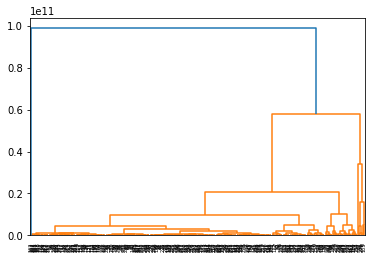

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = df3

dendrogram(linkage(df,method='complete'))
plt.show()

### Hierarchical Clustering Algorithm

In [53]:

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(df)
ulabels = np.unique(labels)
df = pd.DataFrame(df)
df['label'] = labels
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Posisi Rumah,Lebar Jalan Depan Rumah (ROW),label
76,3,845.0,1200,7,8.0,2.0,39999990000,3.0,1.0,0
94,1,120.0,130,3,3.0,2.0,1350000000,0.0,1.0,1
117,1,96.0,135,3,3.0,2.0,2600000000,0.0,1.0,1
150,3,364.0,450,6,5.0,2.0,9500000000,0.0,2.0,1
151,3,600.0,700,5,5.0,2.0,16500000000,0.0,1.0,2
